In [30]:
# Scientific libraries
import scipy
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Graphic libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
# import japanize_matplotlib
import seaborn as sns
# import holoviews as hv
# from bokeh.io import output_notebook
# output_notebook()
# from bokeh.io import show
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
# from ipywidgets import interact # Interactive graph

# Statistical libraries
# import statsmodels.stats as stats
# import statsmodels.stats.multicomp as multi
# import statsmodels.formula.api as smf
import scikit_posthocs as sp

# Other libraries
# import re
# from datetime import datetime
# import collections

# Creating alias for magic commands
%alias_magic t time

from icecream import ic

import math

from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import gamma

#for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Created `%t` as an alias for `%time`.
Created `%%t` as an alias for `%%time`.


In [2]:
def save_fig(name,
             exts=('pdf', 'png', 'svg', 'jpg'),
             bbox_inches='tight'):
    for ext in exts:
        plt.savefig('{}.{}'.format(name, ext),
                    format=ext,
                    bbox_inches=bbox_inches)

In [7]:
def linear_func(x, b_1, b_2):
    return b_1 + b_2*x

def logistic_func(x, b_1, b_2):
    return 1 / (1 + np.exp(-(b_1 + b_2*x)))

def exp_func(x, b_1, b_2):
    return np.exp(b_1 + b_2*x)

def log_func(x, b_1, b_2):
    return np.exp(b_1 + b_2*np.log(x))

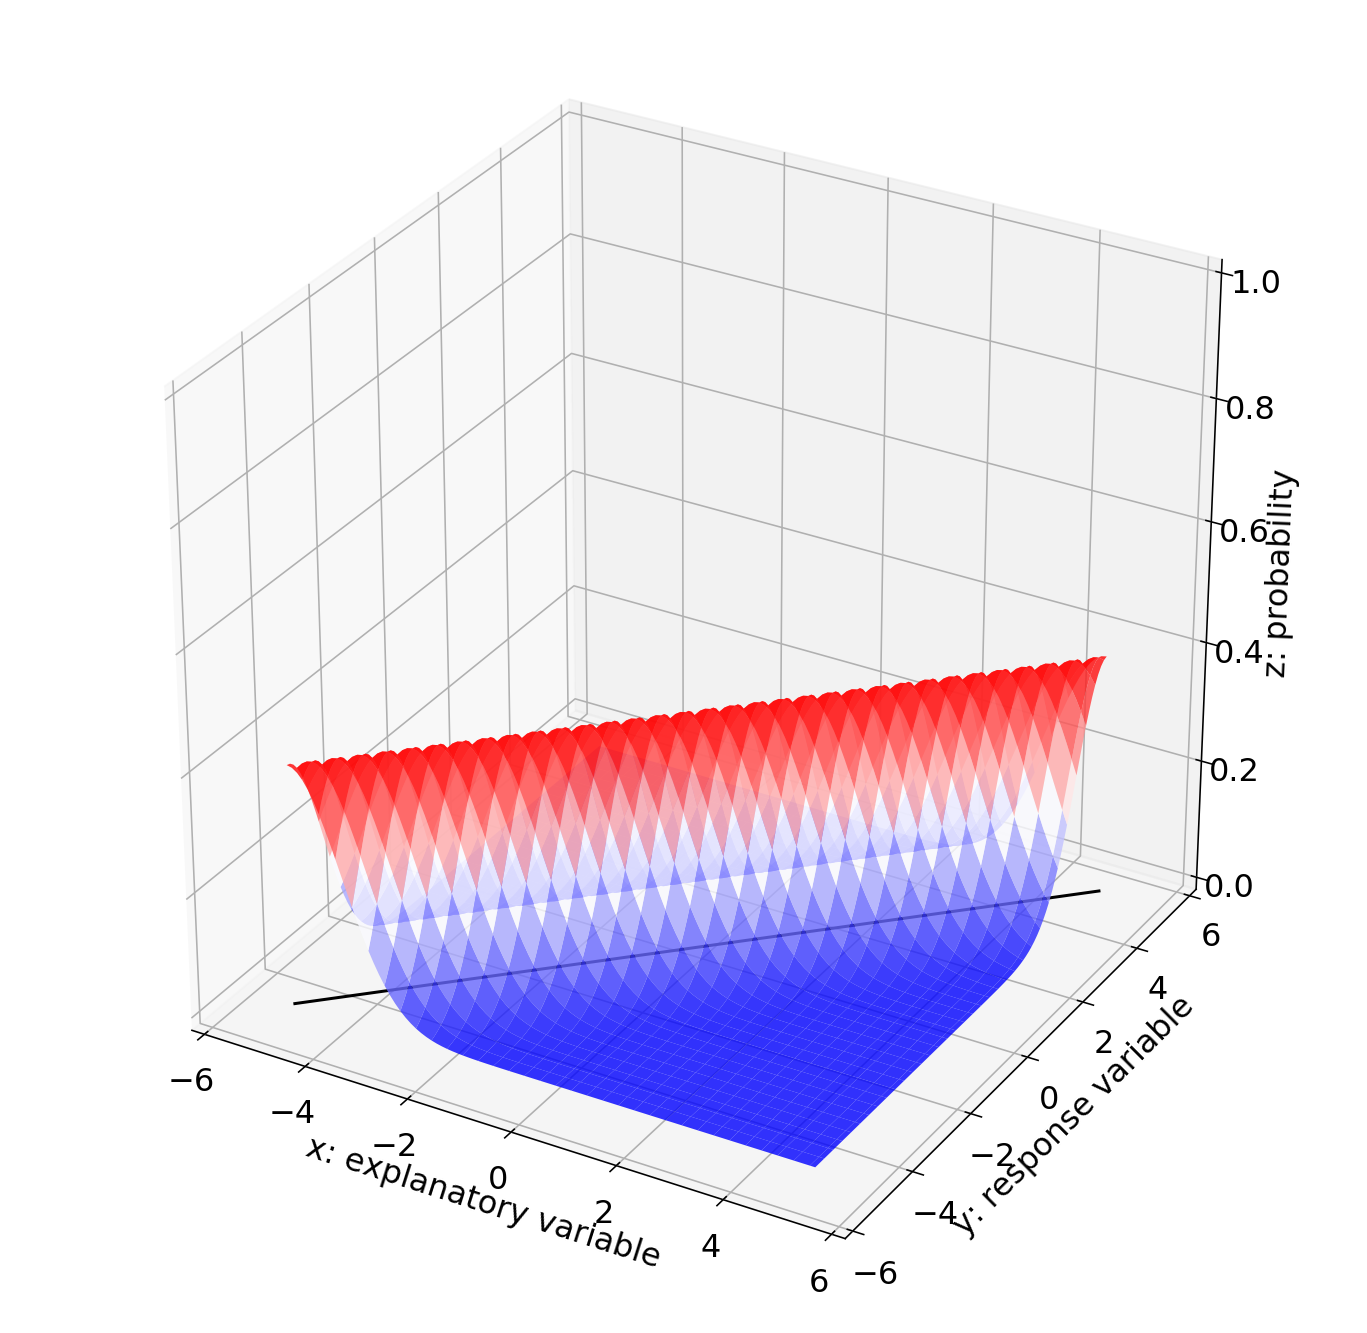

In [4]:
# Set parameters
fontsize = 16
figsize = (12, 12)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.arange(-5, 5.05, 0.1)
y = np.arange(-5, 5.05, 0.1)

X, Y = np.meshgrid(x, y)
XY = np.c_[np.ravel(X), np.ravel(Y)]

ax.plot(x, y, 0,
        color="black")

Y_plot = norm.pdf(XY[:, 0],
                  loc=XY[:, 1],
                  scale=1)
Y_plot = Y_plot.reshape(X.shape)

surf = ax.plot_surface(X, Y, Y_plot,
                       cmap='bwr',
                       linewidth=0,
                       alpha=0.8)

ax.set_xlim(-6, 6)
ax.set_xlabel("x: explanatory variable")
ax.set_ylim(-6, 6)
ax.set_ylabel("y: response variable")
ax.set_zlim(0, 1)
ax.set_zlabel("z: probability")
plt.show()

# for ii in np.arange(0, 360, 3):
#     ax.view_init(elev=30., azim=ii)
#     plt.savefig("movie/movie{:03}.png".format(ii))

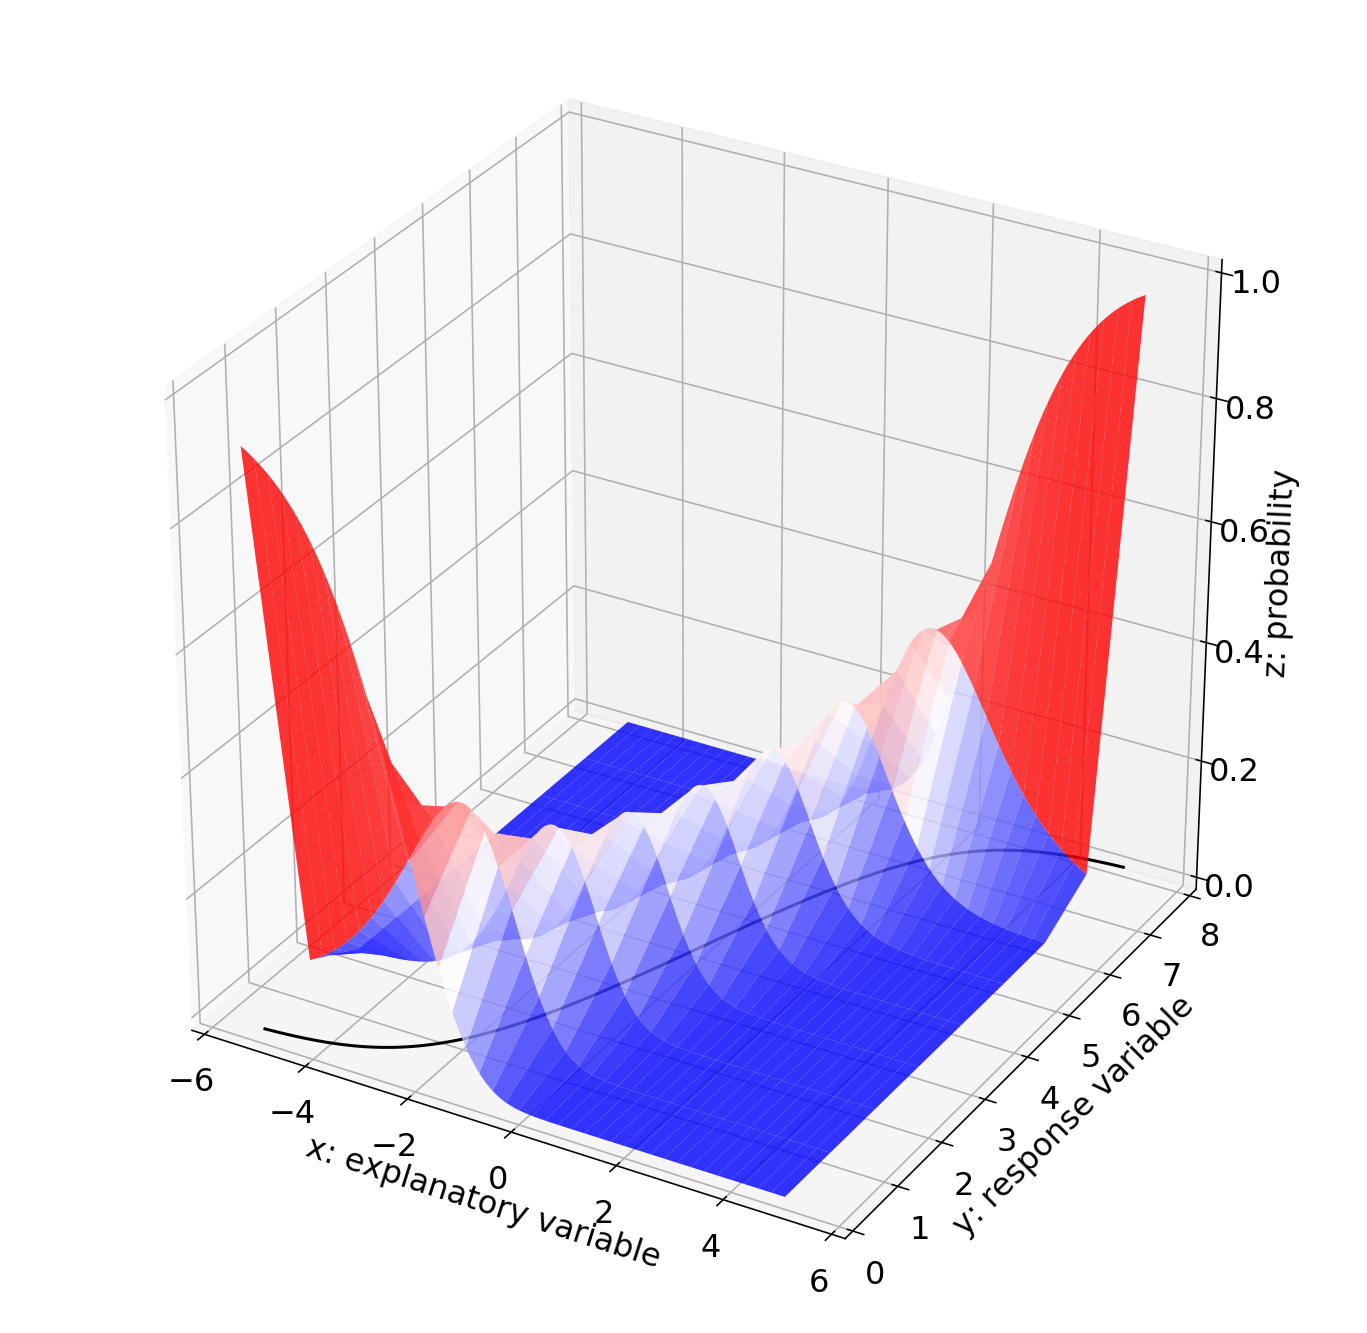

In [5]:

# Set parameters
fontsize = 16
figsize = (12, 12)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.arange(-5, 5.05, 0.05)
y = np.arange(0, 8+1)

X, Y = np.meshgrid(x, y)
XY = np.c_[np.ravel(X), np.ravel(Y)]

ax.plot(x, logistic_func(x, 0, 1)*8, 0,
        color="black")

Y_plot = binom.pmf(XY[:, 1],
                   8,
                   logistic_func(XY[:, 0], 0, 1))
Y_plot = Y_plot.reshape(X.shape)

surf = ax.plot_surface(X, Y, Y_plot,
                       cmap='bwr',
                       linewidth=0,
                       alpha=0.8)

ax.set_xlim(-6, 6)
ax.set_xlabel("x: explanatory variable")
ax.set_ylim(0, 8)
ax.set_ylabel("y: response variable")
ax.set_zlim(0, 1)
ax.set_zlabel("z: probability")
plt.show()

# for ii in np.arange(0, 360, 3):
#     ax.view_init(elev=30., azim=ii)
#     plt.savefig("movie/movie{:03}.png".format(ii))

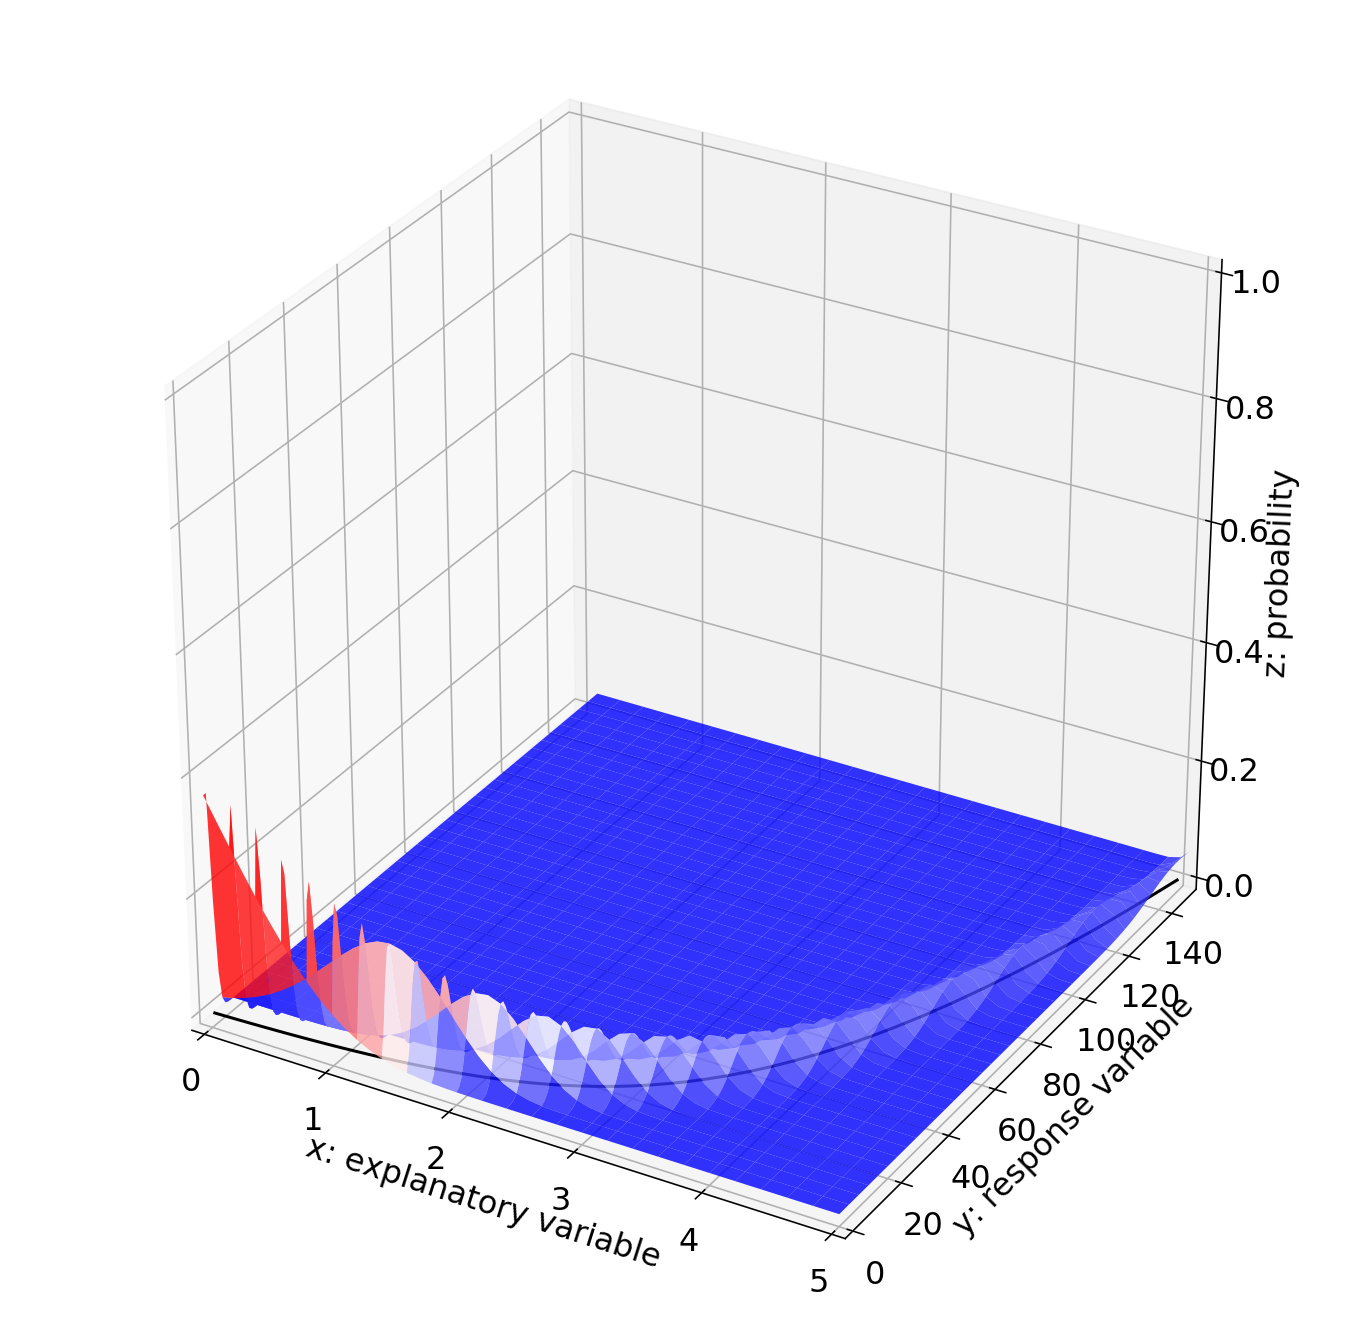

In [6]:

# Set parameters
fontsize = 16
figsize = (12, 12)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.arange(0, 5.05, 0.1)
y = np.arange(0, math.ceil(np.exp(5.05)))

X, Y = np.meshgrid(x, y)
XY = np.c_[np.ravel(X), np.ravel(Y)]

ax.plot(x, exp_func(x, 0, 1), 0,
        color="black")

Y_plot = poisson.pmf(XY[:, 1],
                     mu=exp_func(XY[:, 0], 0, 1))
Y_plot = Y_plot.reshape(X.shape)

surf = ax.plot_surface(X, Y, Y_plot,
                       cmap='bwr',
                       linewidth=0,
                       alpha=0.8)

ax.set_xlim(0, 5)
ax.set_xlabel("x: explanatory variable")
ax.set_ylim(0, np.exp(5))
ax.set_ylabel("y: response variable")
ax.set_zlim(0, 1)
ax.set_zlabel("z: probability")
plt.show()

# for ii in np.arange(0, 360, 3):
#     ax.view_init(elev=30., azim=ii)
#     plt.savefig("movie/movie{:03}.png".format(ii))

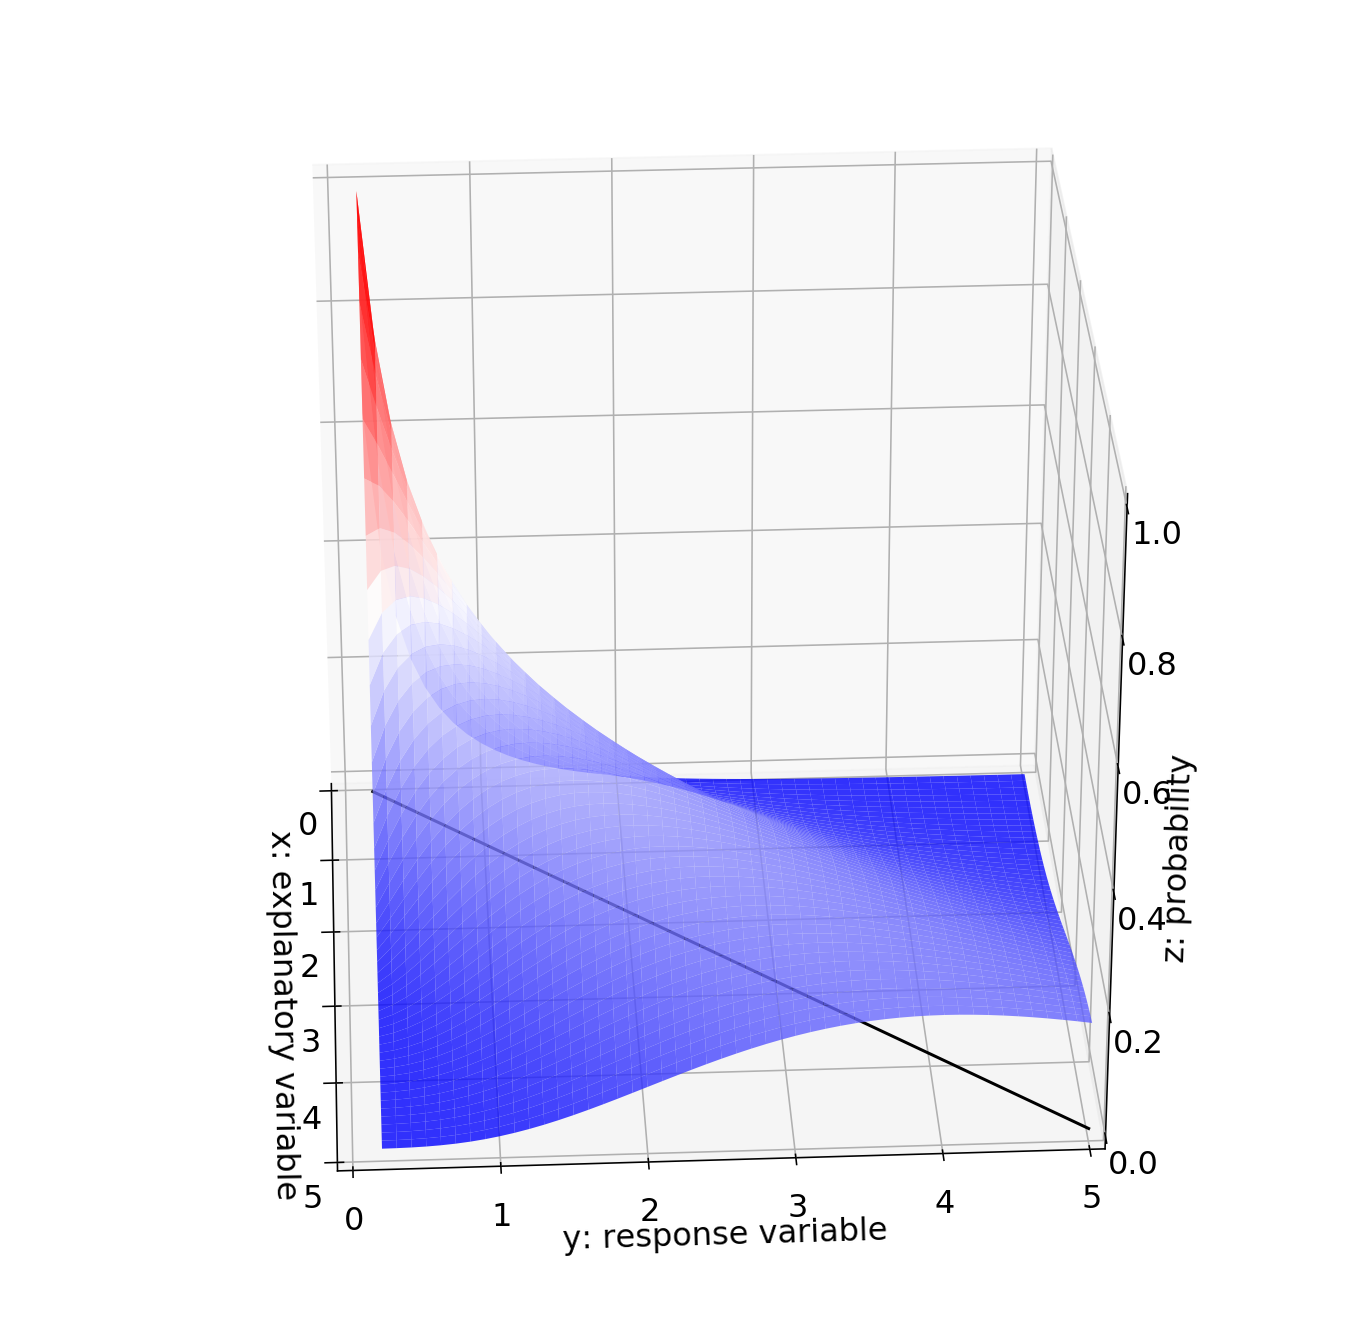

In [75]:

# Set parameters
fontsize = 16
figsize = (12, 12)

rcParams['font.size'] = fontsize
rcParams['figure.figsize'] = figsize

# Generate Figure & Axes instances
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')

x = np.arange(0.2, 5.05, 0.1)
y = np.arange(0.2, 5.05, 0.1)

X, Y = np.meshgrid(x, y)
XY = np.c_[np.ravel(X), np.ravel(Y)]

ax.plot(x, log_func(x, 0, 1), 0,
        color="black")

Y_plot = gamma.pdf(x=XY[:, 1],
                   a=log_func(XY[:, 0], 0, 1))
Y_plot = Y_plot.reshape(X.shape)

surf = ax.plot_surface(X, Y, Y_plot,
                       cmap='bwr',
                       linewidth=0,
                       alpha=0.8)

ax.set_xlim(0, 5)
ax.set_xlabel("x: explanatory variable")
ax.set_ylim(0, 5)
ax.set_ylabel("y: response variable")
ax.set_zlim(0, 1)
ax.set_zlabel("z: probability")

# plt.show()

for ii in np.arange(0, 360, 3):
    ax.view_init(elev=30., azim=ii)
    plt.savefig("movie/movie{:03}.png".format(ii))